# Carga de librerías


In [170]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) #Ignorar error de clase o versión

import numpy as np
import pandas as pd 
import seaborn as sns
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans



from sklearn import linear_model
from sklearn import tree

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import decimal
import sklearn
import yellowbrick


from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.features import PCA
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

%matplotlib inline

# Algoritmos de Machine Learning

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [172]:
print("Ingresa el nombre del archivo a Analizar:")
archivo = input()
archivo = archivo + ".txt"
#SI
#data385Attrib
#cre300
#Slice409

Ingresa el nombre del archivo a Analizar:


 SI


# Carga de datos

In [173]:
#Solo carga y lectura de los parámetros del conjunto de datos
df = pd.read_csv(archivo, sep = " ", header = None, names = ["a", "b", "c"])
Elem = df["a"][0]
Attr = df["a"][1]
NumClas = df["a"][2]
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
print("Número de Elementos: ")
print(Elem)
print("Número de Atributos: ")
print(Attr)
print("Número de Clases: ")
print(NumClas)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------


Número de Elementos: 
420
Número de Atributos: 
19
Número de Clases: 
7
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [174]:
#Cargar y lectura total de los datos del conjunto
df2 = pd.read_table(archivo, header = None, sep = ",",skiprows = 3)
print(df2)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

      0    1   2    3         4         5         6         7         8   \
0    140  125   0  0.0  0.000000  0.277778  0.062963  0.666667  0.311111   
1    188  133   0  0.0  0.000000  0.333333  0.266667  0.500000  0.077778   
2    105  139   0  0.0  0.000000  0.277778  0.107407  0.833333  0.522222   
3     34  137   0  0.0  0.000000  0.500000  0.166667  1.111111  0.474074   
4     39  111   0  0.0  0.000000  0.722222  0.374074  0.888889  0.429629   
..   ...  ...  ..  ...       ...       ...       ...       ...       ...   
415  225   58   0  0.0  0.000000  0.333334  0.421637  0.444444  0.344265   
416  170  154   0  0.0  0.000000  0.111111  0.172133  0.055556  0.136083   
417  238   61   0  0.0  0.000000  0.666667  0.471405  0.722222  0.490653   
418  189   62   0  0.0  0.000000  0.388889  0.250924  0.444444  0.344265   
419  242   57   0  0.0  0.111111  2.444444  2.353877  9.277778  2.760166   

            9          10         11         12         13         14  \
0     6.185185

In [175]:
#Número de Atributos
numAttri = len(df2.columns) #o =Attr
print("Número de Atributos:")
numAttri1 = numAttri-1
print(numAttri1)
numclas = NumClas
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Número de Atributos:
19
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




# División de la matriz del Conjunto de Datos en 2 partes


In [9]:
#Clasificadores con datos puros*
#Separo todos los datos con las características y los resultados
X = np.array(df2.drop([numAttri1], 1))
y = np.array(df2[numAttri1])

In [10]:
print("Ingresa la proporción del conjunto de datos (debe estar entre 0.0 y 1.0 )")
proporcion = input()
proporcion = float(proporcion)
#0.2

Ingresa la proporción del conjunto de datos (debe estar entre 0.0 y 1.0 )


 .2


In [11]:
#Separo los datos de "train" en entrenamiento y prueba para testear los clasificadores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = proporcion)
deTr = format(X_train.shape[0])
deTe = format(X_test.shape[0])
print("Datos para Entrenamiento")
print(deTr)
print("Datos para prueba")
print(deTe)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Datos para Entrenamiento
336
Datos para prueba
84
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [12]:
#Escalado de funciones
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Asignación del número de componentes
print("Ingresa número de componentes")
numComp = input()
numComp = int(numComp)
#2

Ingresa número de componentes


 2


--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




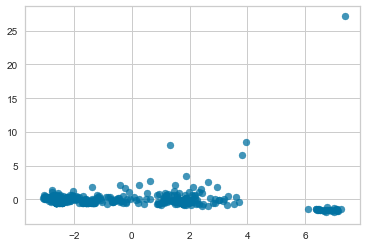

In [14]:
#Pequeña muestra de la gráfica de PCA, más adelante es la definitiva*
pca = PCA(n_components = numComp)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

# Análisis de Datos

In [15]:
print("Información del Conjunto de Datos")
print(df2.info())
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Información del Conjunto de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       420 non-null    int64  
 1   1       420 non-null    int64  
 2   2       420 non-null    int64  
 3   3       420 non-null    float64
 4   4       420 non-null    float64
 5   5       420 non-null    float64
 6   6       420 non-null    float64
 7   7       420 non-null    float64
 8   8       420 non-null    float64
 9   9       420 non-null    float64
 10  10      420 non-null    float64
 11  11      420 non-null    float64
 12  12      420 non-null    float64
 13  13      420 non-null    float64
 14  14      420 non-null    float64
 15  15      420 non-null    float64
 16  16      420 non-null    float64
 17  17      420 non-null    float64
 18  18      420 non-null    float64
 19  19      420 non-null    int64  
dtypes: float64(16), int64(4)
memory usage: 65.

In [16]:
print("Descripción del Conjunto de Datos:")
print(df2.describe())
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Descripción del Conjunto de Datos:
               0           1      2           3           4           5   \
count  420.000000  420.000000  420.0  420.000000  420.000000  420.000000   
mean   144.245238  142.345238    0.0    0.011905    0.005820    1.756878   
std     73.219449   60.798955    0.0    0.035253    0.029154    2.381124   
min      1.000000   11.000000    0.0    0.000000    0.000000    0.000000   
25%     85.000000   92.500000    0.0    0.000000    0.000000    0.666668   
50%    160.000000  152.000000    0.0    0.000000    0.000000    1.333334   
75%    205.000000  190.000000    0.0    0.000000    0.000000    2.166667   
max    253.000000  251.000000    0.0    0.222222    0.222222   25.500000   

               6           7            8           9           10  \
count  420.000000  420.000000   420.000000  420.000000  420.000000   
mean     3.465178    2.357937     6.538579   30.833069   27.335979   
std     30.810966    3.651203    68.978325   31.442611   28.866983   


In [17]:
#Número de Atributos
numAttri = len(df2.columns)

In [18]:
print("Distribución de atributos:")
print(df2.groupby(df2.iloc[:, numAttri1].values).size())
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Distribución de atributos:
0     30
1     30
2     30
3     78
4    119
5     30
6    103
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [19]:
#Colores Random
number_of_colors = 8

color1 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# Datos en las matrices


In [20]:
print("Conjunto de elementos")
print(X)

print("\nClases")
print(y)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Conjunto de elementos
[[140.         125.           0.         ...   7.7777777    0.5456349
   -1.1218182 ]
 [188.         133.           0.         ...   8.444445     0.53858024
   -0.92481726]
 [105.         139.           0.         ...   7.5555553    0.5326279
   -0.96594584]
 ...
 [238.          61.           0.         ...  14.333333     0.5888227
   -2.1218371 ]
 [189.          62.           0.         ...  13.111111     0.6359381
   -2.0669532 ]
 [242.          57.           0.         ...  20.88889      0.46630767
   -2.3706133 ]]

Clases
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

# Normalización


In [21]:
#Apliqué una transformación de los datos para poder aplicar la distribución normal
X_std = StandardScaler().fit_transform(X)

# Cálculo de autovectores y autovalores.

In [22]:
# Calculé la matriz de covarianza
print("NumPy Matriz de covarianza: \n%s"
      %np.cov(X_std.T))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

NumPy Matriz de covarianza: 
[[ 1.00238663 -0.00517655  0.         -0.09000882 -0.00527915 -0.07761408
  -0.08324898 -0.10555245 -0.06898446 -0.04813542 -0.05291044 -0.02840126
  -0.06719666 -0.00450509  0.07792637 -0.11326005 -0.04189296 -0.09883005
  -0.12819719]
 [-0.00517655  1.00238663  0.          0.23891706  0.01220751  0.04390118
  -0.05785436  0.08021026 -0.04556318 -0.20818285 -0.20693508 -0.22851966
  -0.18107766  0.18597578 -0.29217723  0.29756008 -0.19260387 -0.0982089
   0.52182882]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.09000882  0.23891706  0.          1.00238663  0.04721002  0.00632074
  -0.02091117  0.01652921 -0.02277823  0.03103135  0.03174881  0.01749016
   0.04665142 -0.0192451  -0.05511378  0.09696486  0.03424307 -0.02753345
   0.19669682]
 [-0.00527915  0.01220751  0.          0.0472100

In [23]:
# Valor propio y Vector Propio de la matriz
covMat = np.cov(X_std.T)

propiVal, propiVec = np.linalg.eig(covMat)

In [24]:
print("Vectores propios \n%s" %propiVec)

print("\nValores propios \n%s" %propiVal)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Vectores propios 
[[-1.50400773e-03  8.18822224e-02  1.86509609e-01  5.87474198e-01
   4.86280456e-01  2.08417501e-01  5.46599353e-01  8.43500430e-02
   1.03777771e-01  6.40966938e-02 -1.03521101e-01 -4.07341826e-02
   1.82988662e-02  1.74644110e-05 -6.41882416e-10  3.33040599e-09
   2.20850876e-09  1.44346353e-09  0.00000000e+00]
 [-1.05147984e-01 -4.99508107e-02 -4.35383517e-01  4.03841947e-01
  -2.87511415e-02  3.57361708e-02 -2.51567012e-01  5.20517946e-01
  -4.85477385e-01 -7.60705598e-02 -1.13826656e-01  2.07097414e-01
  -3.71250333e-03  1.17663412e-02  1.87255135e-09 -8.77639261e-09
   4.08456005e-09  2.60937279e-10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-6.11001000e-03 -8.25849576e-03 -3.

In [25]:
#  Hice una lista de parejas (Vector Propio, Valor Propio) 
propiPares = [(np.abs(
                propiVal[i]),
                propiVec[:, i])
                for i in range(len(propiVal)
             )]

propiPares.sort(key = lambda x: x[0], reverse = True)

In [26]:
# Muestro la lista de autovalores en orden Descendente
print("Autovalores en orden descendente: ")
for i in propiPares:
    print(i[0])
    
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Autovalores en orden descendente: 
7.4664454596338246
2.988640996720376
1.918781910553198
1.13303508945293
1.0440995975844052
0.8489187121083646
0.7581758122454765
0.6922079488004307
0.5002248619420574
0.3444461275193996
0.22120116881796997
0.08489262007082404
0.04132538898348199
0.0005637327749220163
3.928112131810498e-15
3.031535052614494e-15
2.0939854128801438e-15
4.5800129839771356e-17
0.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




# Seleccioné los Vectores Propios correspondientes a las componentes principales


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




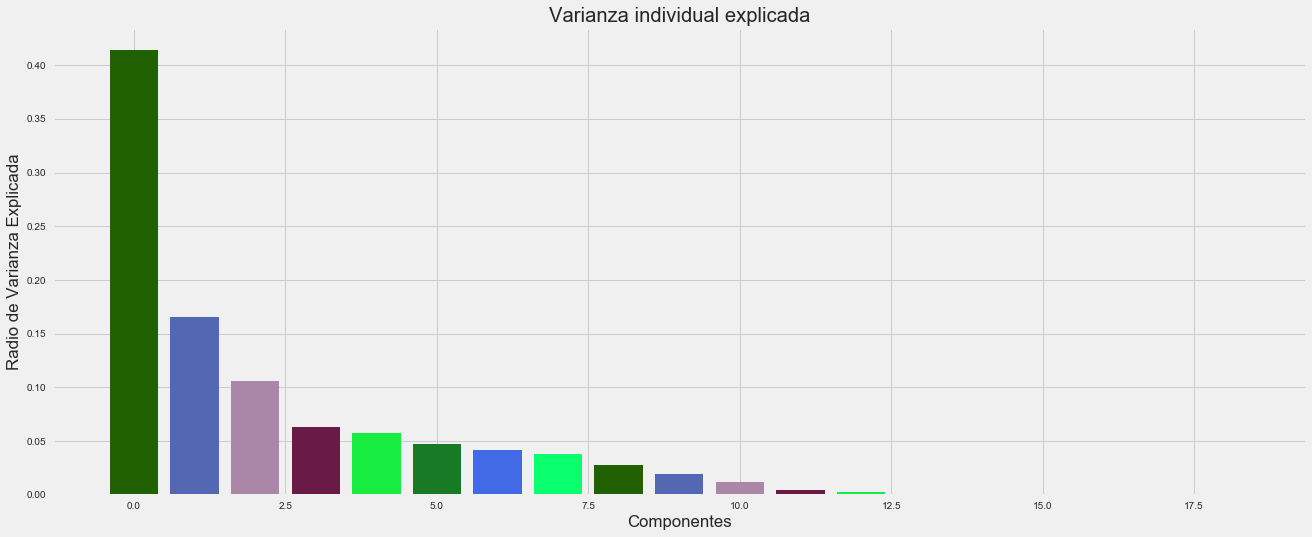

In [27]:
# Valores Propios, calculé la varianza explicada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cumVarExp = np.cumsum(varExp)

# Varianza explicada por cada Valor Propio, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(20, 8))    
    #plt.figure(figsize=(numAttri1, 8))
    plt.xlabel("Componentes")
    plt.ylabel("Radio de Varianza Explicada")
    plt.title("Varianza individual explicada")
    plt.bar(range(numAttri1), np.real(varExp), align = "center", color = color1, ecolor = "black")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




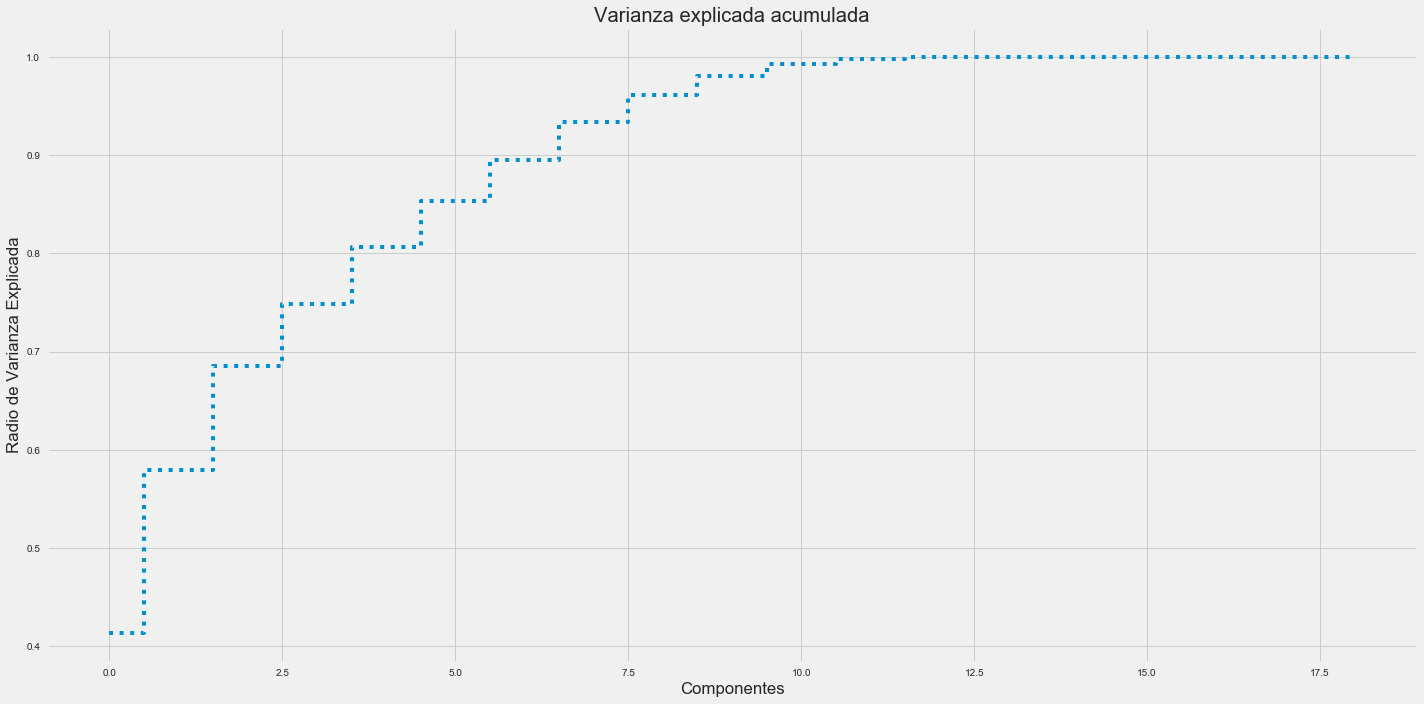

In [28]:
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
# Varianza explicada por cada Valor Propio, y la acumulada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cum_var_exp = np.cumsum(varExp)

# Varianza explicada por cada autovalor, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize = (20, 10))   
#    plt.figure(figsize = (numAttri1, 10))
    #plt.show()
    
    plt.step(range(numAttri1), np.real(cum_var_exp), where = "mid", linestyle = ":")
    plt.ylabel("Radio de Varianza Explicada")
    plt.xlabel("Componentes")
    plt.title("Varianza explicada acumulada")
    plt.tight_layout()
    
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

# Datos Puros.


In [29]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
matriz_PCA = np.hstack((propiPares[0][1].reshape(numAttri1, 1),
                        propiPares[1][1].reshape(numAttri1, 1)
                       ))

Y = X_std.dot(matriz_PCA)
Y = np.real(Y)

PCA
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




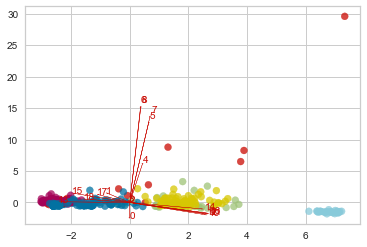

In [169]:
###Datos Puros* del Conjunto
##print("PCA")
##visualizer = PCA(scale = True, proj_features = True)
##visualizer.fit_transform(X, y)
##visualizer.show()
##print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

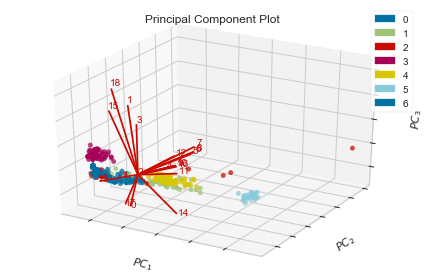

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [31]:
###Datos Puros* del Conjunto
##visualizer = PCA(scale = True, proj_features = True, projection = 3)
##visualizer.fit_transform(X, y)
##visualizer.show()
##print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

# Datos sobre un espacio de dimensionalidad 2.

In [37]:
wrange = range(0, int(NumClas))
with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(20,10))    
#    plt.figure(figsize=(numAttri1,10))
    for eti, colu in zip((wrange), color1):
        plt.scatter(Y[y == eti, 0],
                    Y[y == eti, 1],
                    c = colu,
                    label = eti)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc = "lower left")
    plt.tight_layout()
    plt.show()

In [38]:
#Asignar valores de los N componentes - Entrenamiento* 
pDf = pd.DataFrame(data = X_train
             , columns = ["Componente Principal 1", "Componente Principal 2"])
fDf = pd.concat([pDf, df2[[numAttri1]]], axis = 1)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




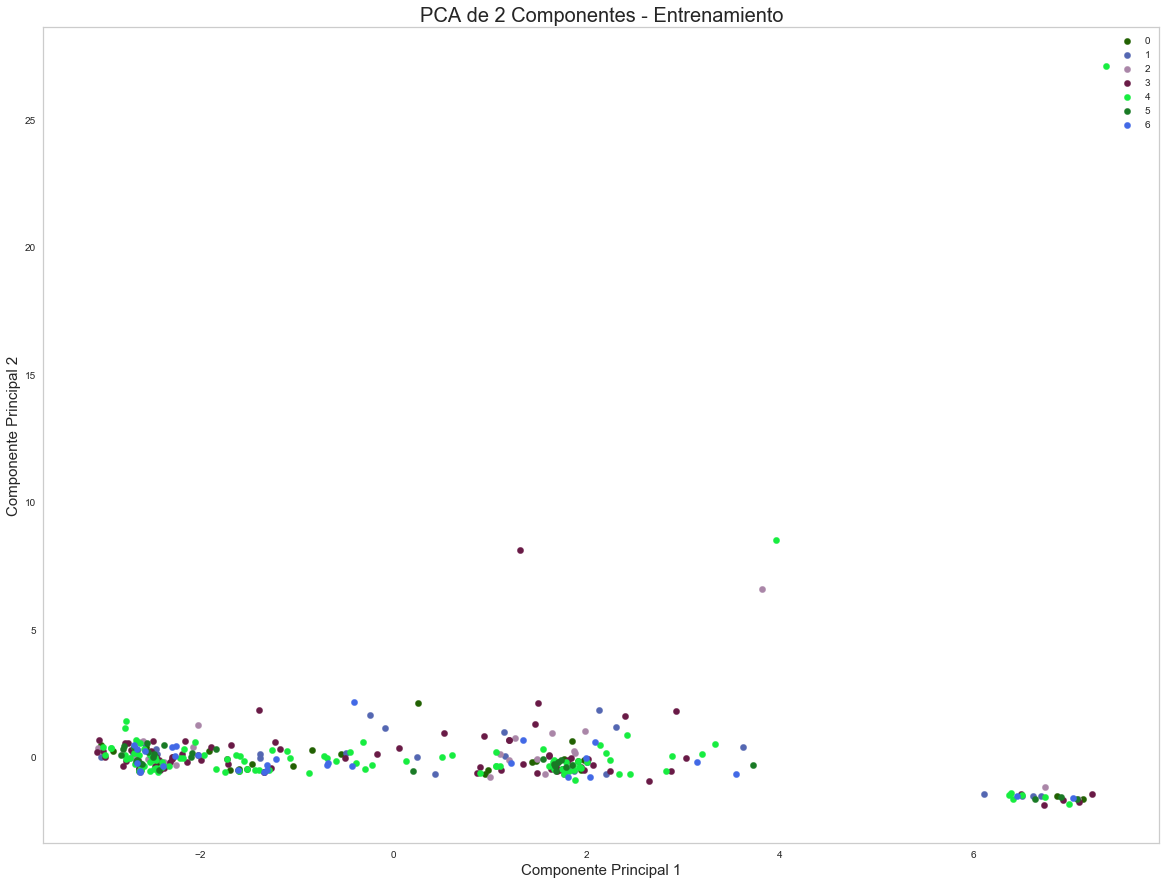

In [39]:
fig = plt.figure(figsize = (20,15))

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("Componente Principal 1", fontsize = 15)
ax.set_ylabel("Componente Principal 2", fontsize = 15)
ax.set_title("PCA de {} Componentes - Entrenamiento".format(numComp), fontsize = 20)

targets = range(0, int(NumClas))

for target, color in zip(targets, color1):
    indicesToKeep = fDf[numAttri1] == target
    ax.scatter(fDf.loc[indicesToKeep, "Componente Principal 1"]
               , fDf.loc[indicesToKeep, "Componente Principal 2"]
               , c = color
               , s = 40)
    
ax.legend(targets)
ax.grid()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [40]:
#Asignar valores de los N componentes - Prueba* 
pDfT = pd.DataFrame(data = X_test
             , columns = ["Componente Principal 1", "Componente Principal 2"])
fDfT = pd.concat([pDfT, df2[[numAttri1]]], axis = 1)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




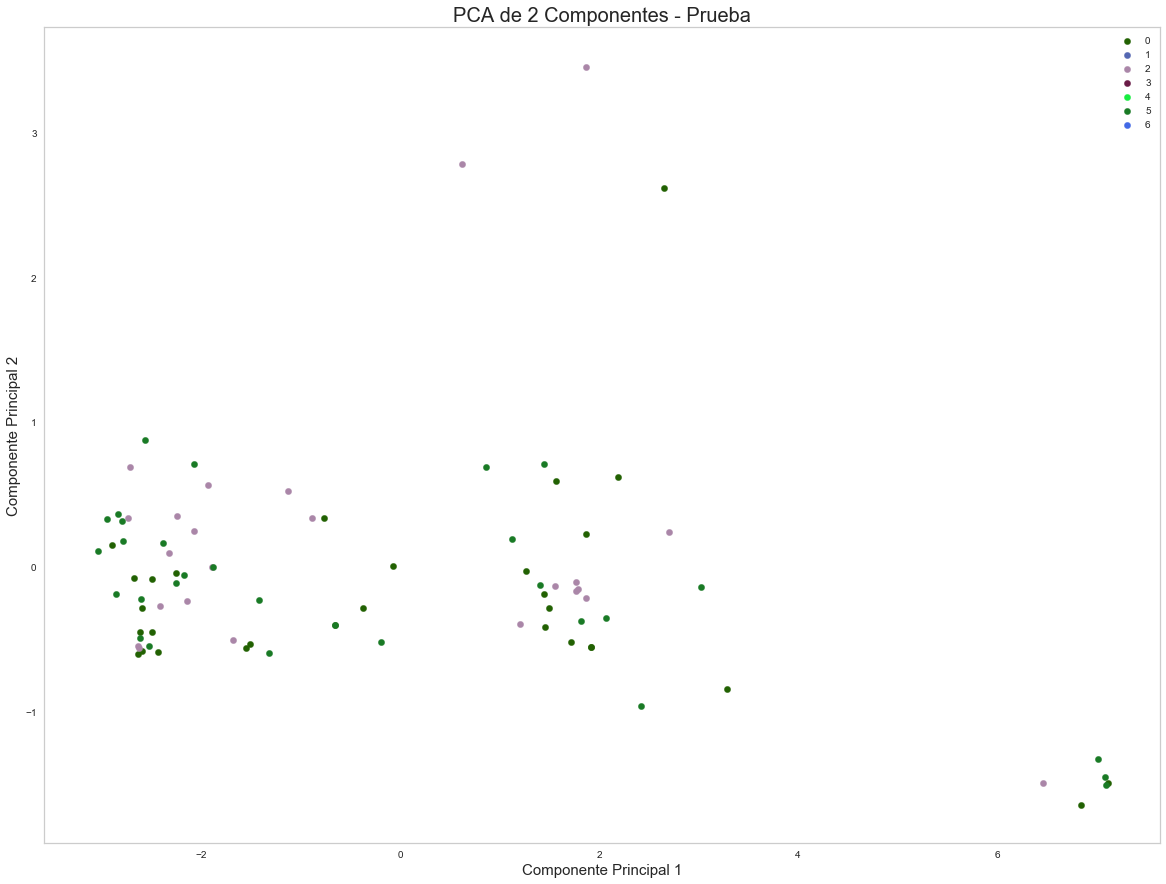

In [41]:
fig = plt.figure(figsize = (20,15))

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("Componente Principal 1", fontsize = 15)
ax.set_ylabel("Componente Principal 2", fontsize = 15)
ax.set_title("PCA de {} Componentes - Prueba".format(numComp), fontsize = 20)

targets = range(0, int(NumClas))

for target, color in zip(targets, color1):
    indicesToKeep = fDfT[numAttri1] == target
    ax.scatter(fDfT.loc[indicesToKeep, "Componente Principal 1"]
               , fDfT.loc[indicesToKeep, "Componente Principal 2"]
               , c = color
               , s = 40)
    
ax.legend(targets)
ax.grid()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [42]:
#FUNCIONES EXTRA

K-Medias


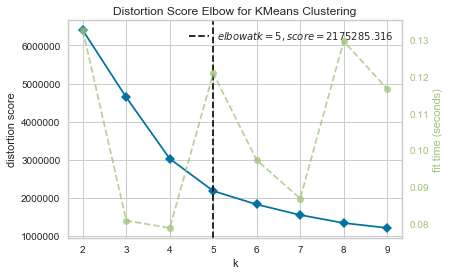

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [43]:
#Daros Puros* del Conjunto
print("K-Medias")
kelbow_visualizer(KMeans(random_state = 4), X, k = (2,10))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [44]:
print("Número de grupos")
numGr = input()
numGr = int(numGr)
#7

Número de grupos


 7


Mapas de distancia intercluster


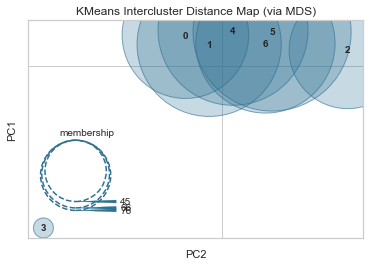

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [45]:
# Instanciar el modelo de agrupamiento y el visualizador
model = KMeans(numGr)
visualizer = InterclusterDistance(model)

print("Mapas de distancia intercluster")
visualizer.fit(X)        # Ajustar los datos al visualizador
visualizer.show()        # Finaliza y renderiza la figura
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [46]:
###gráfico donde se puedan observar las relaciones entre variables y sus histogramas
##
##sns.pairplot(df2)
##plt.show()
#HABILITAR si desea ver la relación

In [47]:
##sns.set(style="ticks")
##
##g = sns.pairplot(df2, corner = True)
#HABILITAR Para trazar múltiples distribuciones bivariadas por pares en un conjunto de datos

In [48]:
##g = sns.pairplot(df2, kind = "reg")
#HABILITAR Para trazar múltiples distribuciones bivariadas por pares en un conjunto de datos

# K Vecinos más Cercanos

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
print("\033[;32m"+"\n\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("K Vecinos más Cercanos")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")



--------------------------------------------------------------------------------------------------------------------------------------------------------------------
K Vecinos más Cercanos
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [50]:
print("Número de vecinos a usar: ")
numV = input()
numV = int(numV)
#7

Número de vecinos a usar: 


 7


In [52]:
#Algoritmo
kvc = KNeighborsClassifier(n_neighbors = numV, metric = "minkowski") #La métrica predeterminada es minkowski, y con p = 2 es equivalente a la métrica euclidiana estándar

In [53]:
print("Ingresa el número de pliegues: ")
pliegues = input()
pliegues = int(pliegues)
#10

Ingresa el número de pliegues: 


 10


In [54]:
#Rendimiento
puntaje = cross_val_score(kvc, X, y, cv = pliegues, scoring = "accuracy")

In [55]:
#Lo Entreno
kvc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [56]:
#Predicción
y_pred = kvc.predict(X_test)
y_predE = kvc.predict(X_train)

In [57]:
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
predecir = cross_val_predict(kvc, X, y, cv = pliegues)
matriz = confusion_matrix(y, predecir)
print("Matriz de Confusión")
print(matriz)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión
[[ 23   0   1   0   0   0   6]
 [  3  23   1   1   0   0   2]
 [  9   1  15   0   1   0   4]
 [  0   0   0  78   0   0   0]
 [  0   0   0   0 119   0   0]
 [  0   0   0   0   0  30   0]
 [  5   2   3   0   0   0  93]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [58]:
predicciones = []
for f in  predecir:
    r = random.triangular(-.1, .1)
    r = round(r, 3)
    predicciones.append(f + r)

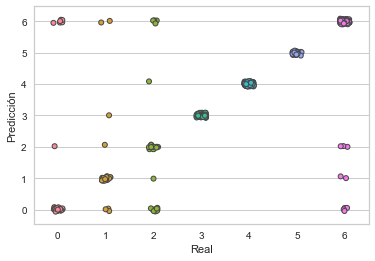

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [59]:
real = pd.DataFrame(data = y, columns = ["Real"])
clases = pd.DataFrame(data = y, columns = ["Clases"])
predecidas = pd.DataFrame(data = predicciones, columns = ["Predicción"])
matrix = pd.concat([real, predecidas, clases], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = matrix, jitter = .1, linewidth = 1)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [60]:
df_confusion1 = pd.crosstab(y_test, y_pred)
df_confusion11 = pd.crosstab(y_train, y_predE)

In [61]:
df_confusion1 = pd.crosstab(y_test, y_pred, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion11 = pd.crosstab(y_train, y_predE, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)

In [62]:
df_conf_norm = df_confusion1 / df_confusion1.sum(axis = 1)
df_conf_norm11 = df_confusion11 / df_confusion1.sum(axis = 1)

In [63]:
def plot_confusion_matrix(df_confusion1, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion1, cmap = cmap) # imshow

    plt.colorbar()
    tick_marks = np.arange(len(df_confusion1.columns))
    plt.xticks(tick_marks, df_confusion1.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion1.index)

    plt.ylabel(df_confusion1.index.name)
    plt.xlabel(df_confusion1.columns.name)
    
def plot_confusion_matrix1(df_confusion11, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion11, cmap = cmap) # imshow

    plt.colorbar()
    tick_marks = np.arange(len(df_confusion11.columns))
    plt.xticks(tick_marks, df_confusion11.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion11.index)

    plt.ylabel(df_confusion11.index.name)
    plt.xlabel(df_confusion11.columns.name)


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




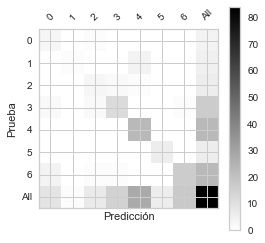

In [64]:
plot_confusion_matrix(df_confusion1)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [65]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión - Prueba:")

print(matrizKV)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Prueba:
[[ 3  0  1  0  0  0  0]
 [ 0  1  0  0  4  0  0]
 [ 0  0  3  2  1  0  0]
 [ 2  0  2 12  0  0  1]
 [ 0  0  0  0 23  0  0]
 [ 0  0  0  0  0  6  0]
 [ 4  0  1  1  0  0 17]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [66]:
#Precisión Prueba
preKVCP = format(kvc.score(X_test, y_test))
preKVCP = (float(preKVCP)*100)

print("Precisión K-Vecinos más Cercanos: ")
print("{0:.2f}".format(preKVCP) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K-Vecinos más Cercanos: 
77.38%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




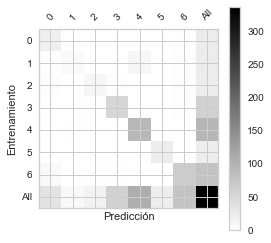

In [67]:
plot_confusion_matrix1(df_confusion11)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [68]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_train, y_predE)
print("Matriz de Confusión - Entrenamiento:")

print(matrizKV)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Entrenamiento:
[[22  0  1  1  0  0  2]
 [ 2  7  0  0 13  0  3]
 [ 5  0 13  3  0  0  3]
 [ 1  0  2 55  0  0  3]
 [ 0  2  0  0 94  0  0]
 [ 0  0  0  0  0 24  0]
 [ 8  1  2  2  0  0 67]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [69]:
#Precisión Entrenamiento
preKVCE = format(kvc.score(X_test, y_test))
preKVCE = (float(preKVCE)*100)

print("Precisión K-Vecinos más Cercanos: ")
print("{0:.2f}".format(preKVCE) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K-Vecinos más Cercanos: 
77.38%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




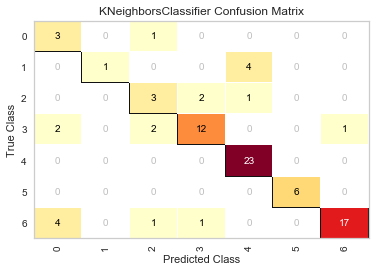

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [70]:
#Implementando Entrenamiento y Prueba
classes = range(0, int(NumClas))

cm = ConfusionMatrix(kvc, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

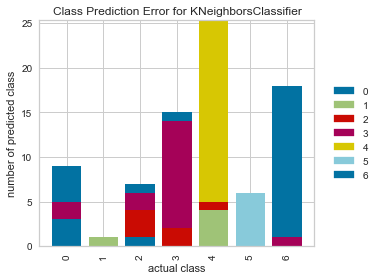

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [71]:
classes = range(0, int(NumClas))

# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    kvc, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [72]:
#Validación Cruzada Prueba
precisionKVCP = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}\n".format(precisionKVCP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCP),
                                          np.std(precisionKVCP)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisiones: [0.69047619 0.64285714]

Precisión promedio:  0.667 +/-  0.024
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [73]:
#Validación Cruzada Entrenamiento
precisionKVCE = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Precisiones: {}\n".format(precisionKVCE))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCE),
                                          np.std(precisionKVCE)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisiones: [0.82352941 0.76470588 0.79411765 0.76470588 0.76470588 0.73529412
 0.81818182 0.87878788 0.75757576 0.84848485]

Precisión promedio:  0.795 +/-  0.044
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




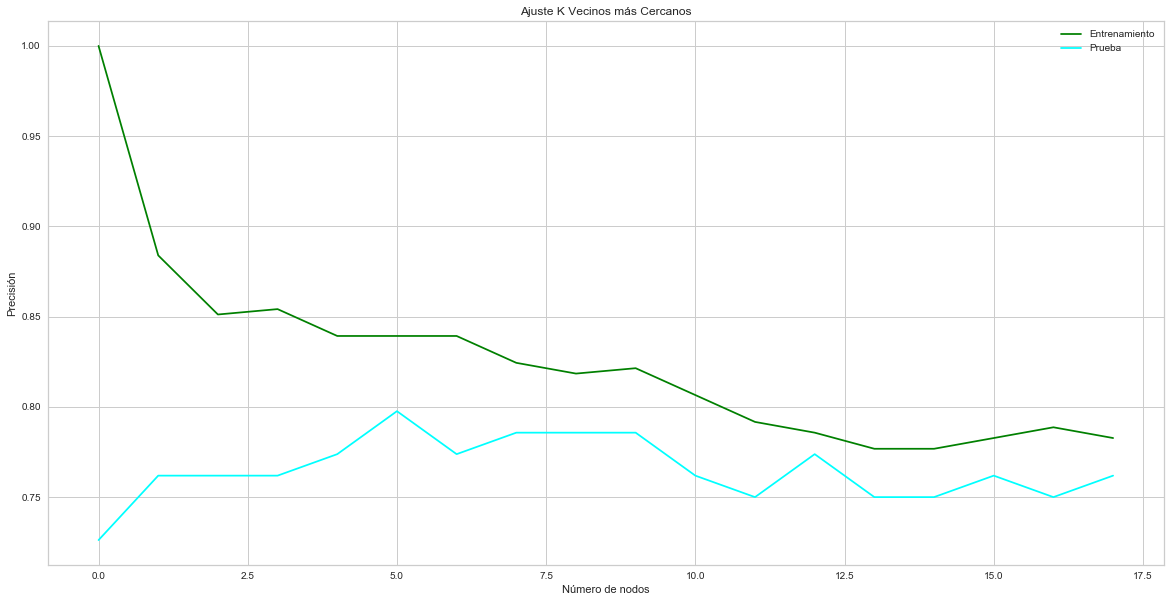

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [74]:
# Grafico de ajuste de K Vecinos más Cercanos
numAttri2 = deTr
k_range = range(1, int(numAttri1))
#k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(train_prec, color="green", label="Entrenamiento")
plt.plot(eval_prec, color="cyan", label="Prueba")
plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

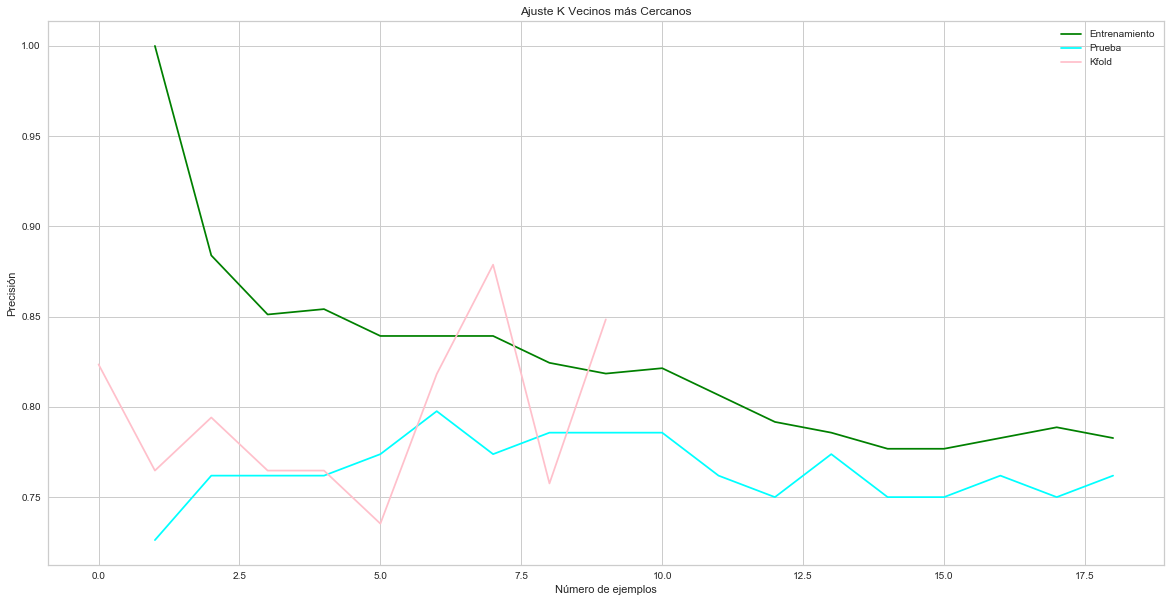

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [75]:
#Validación Cruzada Entrenamiento
precisionKVCE = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, int(numAttri1))
#k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(k_range, train_prec, color = "green", label = "Entrenamiento")
plt.plot(k_range, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionKVCE, color = "pink", label = "Kfold")

plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [80]:
#Precisión del modelo - Prueba
print("Precisión K Vecinos Más Cercanos - Prueba")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K Vecinos Más Cercanos - Prueba
              precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       1.00      0.20      0.33         5
           2       0.43      0.50      0.46         6
           3       0.80      0.71      0.75        17
           4       0.82      1.00      0.90        23
           5       1.00      1.00      1.00         6
           6       0.94      0.74      0.83        23

    accuracy                           0.77        84
   macro avg       0.76      0.70      0.68        84
weighted avg       0.82      0.77      0.77        84

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [81]:
#Precisión del modelo - Entrenamiento
print("Precisión K Vecinos Más Cercanos - Entrenamiento")
print(classification_report(y_train, y_predE))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K Vecinos Más Cercanos - Entrenamiento
              precision    recall  f1-score   support

           0       0.58      0.85      0.69        26
           1       0.70      0.28      0.40        25
           2       0.72      0.54      0.62        24
           3       0.90      0.90      0.90        61
           4       0.88      0.98      0.93        96
           5       1.00      1.00      1.00        24
           6       0.86      0.84      0.85        80

    accuracy                           0.84       336
   macro avg       0.81      0.77      0.77       336
weighted avg       0.84      0.84      0.83       336

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




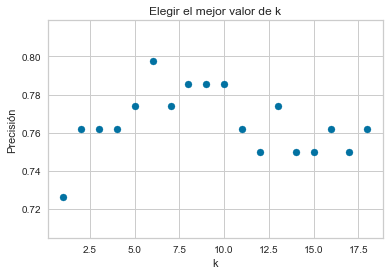

In [82]:
#Elegir el mejor valor de k
k_range = range(1, numAttri1)
#k_range = range(1, int(numAttri2))

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.title("Elegir el mejor valor de k")
plt.xlabel("k")
plt.ylabel("Precisión")
plt.scatter(k_range, scores)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [83]:
# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = kvc,
                        X = X, y = y, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




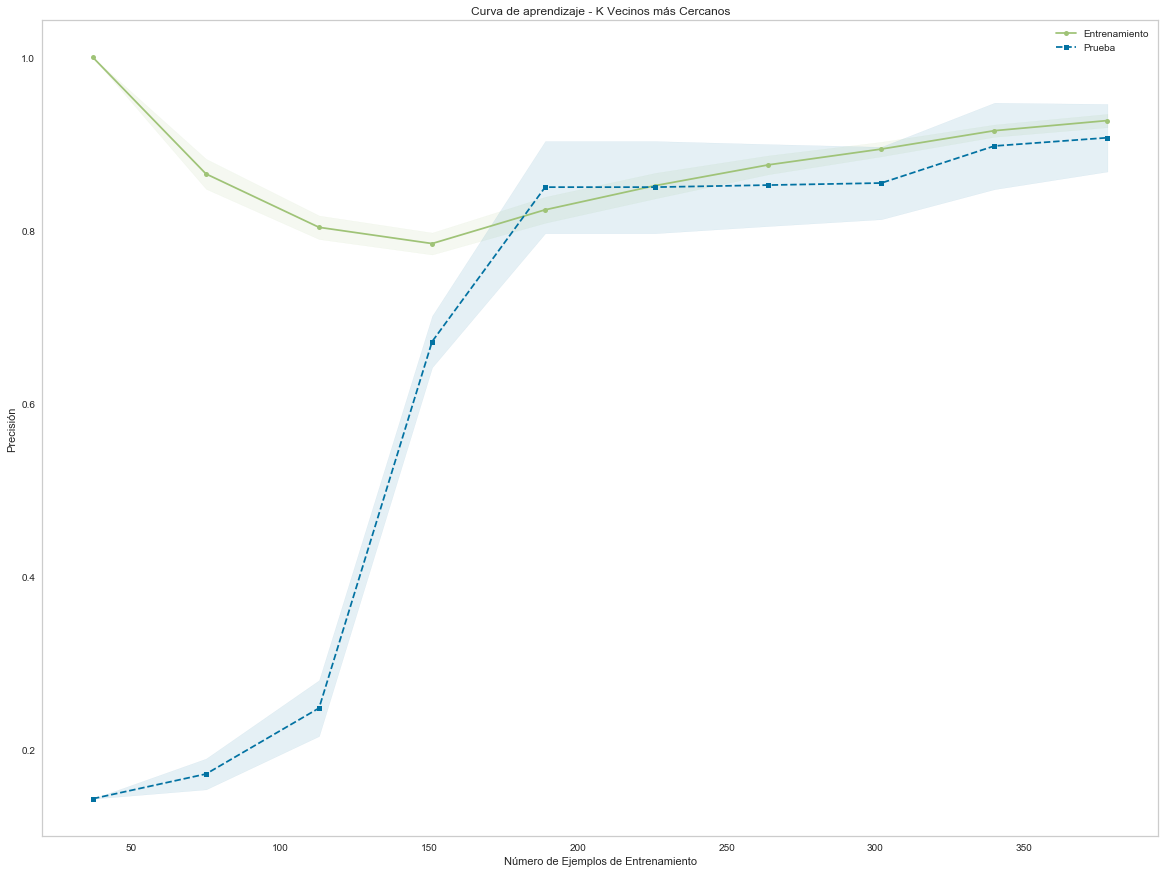

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [84]:
# Graficando las curvas
plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")

plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")

plt.grid()

plt.title("Curva de aprendizaje - K Vecinos más Cercanos")
plt.legend(loc = "best")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [86]:
print("Promedio Total de Precisión:")
prom1 = float(np.mean(puntaje)*100)
print("{0:.2f}".format(prom1) + "%")
error1 = 100 - prom1
print("Protenjate de Error:")
print("{0:.2f}".format(error1) + "%")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Promedio Total de Precisión:
90.71%
Protenjate de Error:
9.29%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [87]:
print("Número de Aciertos")
asi1 = (int(Elem)/100)*prom1
print("{0:.0f}".format(asi1))
fallos1 = (int(Elem)/100)*error1
print("Número de Fallos")
print("{0:.0f}".format(fallos1))

Número de Aciertos
381
Número de Fallos
39


# Navie Bayes

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

print("\033[;36m"+"\n\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Navie Bayes")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")



--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Navie Bayes
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [89]:
#Algoritmo
gnb = GaussianNB()

In [90]:
puntuación = cross_val_score(gnb, X, y, cv = pliegues, scoring = "accuracy")

In [91]:
#Lo Entreno
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
#Predicción
y_pred2 = gnb.predict(X_test)
y_pred22 = gnb.predict(X_train)

In [93]:
cvp = cross_val_predict(gnb, X, y, cv = pliegues)
matriz = confusion_matrix(y, cvp)
print("Matriz de Confusión")
print(matriz)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión
[[ 26   2   0   0   0   0   2]
 [  3  22   4   0   0   0   1]
 [  2   1   8   0   0   0  19]
 [  0   0   1  76   0   0   1]
 [  0  14   2   0 103   0   0]
 [  0   0   0   0   0  30   0]
 [  4   2   5   0   0   0  92]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [94]:
predicciones = []
for f in  cvp:
    r = random.triangular(-.1, .1)
    r = round(r, 3)
    predicciones.append(f + r)

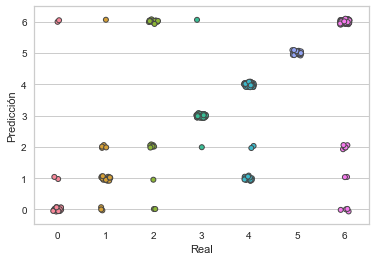

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [95]:
clas = pd.DataFrame(data = y, columns = ["Clases"])
real = pd.DataFrame(data = y, columns = ["Real"])
prede = pd.DataFrame(data = predicciones, columns = ["Predicción"])
concatenado = pd.concat([real, prede, clas], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = concatenado, jitter = .1, linewidth = 1)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [96]:
print("Precisión Navie Bayes: ")
print("{0:.2f}".format(np.mean(puntuación)*100) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes: 
85.00%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [97]:
df_confusion2 = pd.crosstab(y_test, y_pred2)
df_confusion22 = pd.crosstab(y_train, y_pred22)

In [98]:
df_confusion2 = pd.crosstab(y_test, y_pred2, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion22 = pd.crosstab(y_train, y_pred22, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)

In [99]:
df_conf_norm2 = df_confusion2 / df_confusion2.sum(axis = 1)
df_conf_norm22 = df_confusion22 / df_confusion22.sum(axis = 1)

In [100]:
def plot_confusion_matrix(df_confusion2, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion2, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion2.columns))
    plt.xticks(tick_marks, df_confusion2.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion2.index)
    plt.ylabel(df_confusion2.index.name)
    plt.xlabel(df_confusion2.columns.name)

def plot_confusion_matrix2(df_confusion22, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion22, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion22.columns))
    plt.xticks(tick_marks, df_confusion22.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion22.index)
    plt.ylabel(df_confusion22.index.name)
    plt.xlabel(df_confusion22.columns.name)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




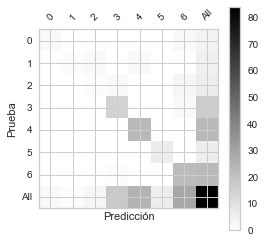

In [101]:
plot_confusion_matrix(df_confusion2)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [102]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión - Prueba:")
print(matrizGNB)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Prueba:
[[ 2  0  0  0  0  0  2]
 [ 0  1  2  0  2  0  0]
 [ 0  0  1  2  0  0  3]
 [ 0  0  0 15  0  0  2]
 [ 0  0  0  0 23  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  1  0  0 22]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [106]:
#Precisión Prueba
preGNBP = format(gnb.score(X_test, y_test))
preGNBP = float(preGNBP)*100
print("Precisión Navie Bayes - Prueba: ")
print("{0:.2f}".format(preGNBP) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes: 
83.33%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




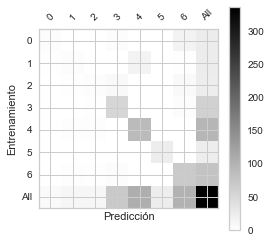

In [107]:
plot_confusion_matrix2(df_confusion22)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [108]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_train, y_pred22)
print("Matriz de Confusión - Entrenamiento:")

print(matrizGNB)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Entrenamiento:
[[ 5  1  0  4  0  0 16]
 [ 2  4  0  0 17  0  2]
 [ 0  2  5  8  0  0  9]
 [ 0  0  2 54  0  0  5]
 [ 0  3  3  0 90  0  0]
 [ 0  0  0  0  0 24  0]
 [ 0  3  2  5  0  0 70]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [109]:
#Precisión Entrenamiento
preGNBE = format(gnb.score(X_train, y_train))
preGNBE = float(preGNBE)*100

print("Precisión Navie Bayes - Entrenamiento: ")
print("{0:.2f}".format(preGNBE) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes - Entrenamiento: 
75.00%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




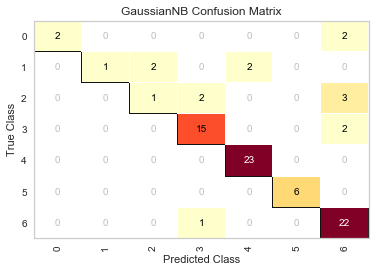

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [110]:
cm = ConfusionMatrix(gnb, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

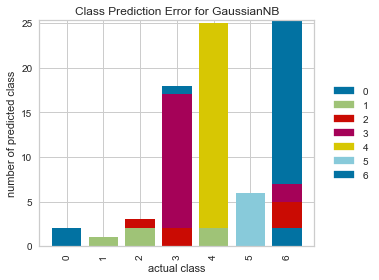

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [111]:
# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    gnb, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [112]:
print("Validación Cruzada - Prueba")
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}\n".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Validación Cruzada - Prueba
Precisiones: [0.83333333 0.71428571]

Precisión promedio:  0.774 +/-  0.060
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [113]:
print("Validación Cruzada - Entrenamiento")
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Precisiones: {}\n".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Validación Cruzada - Entrenamiento
Precisiones: [0.76470588 0.67647059 0.70588235 0.85294118 0.70588235 0.52941176
 0.84848485 0.75757576 0.78787879 0.75757576]

Precisión promedio:  0.739 +/-  0.089
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




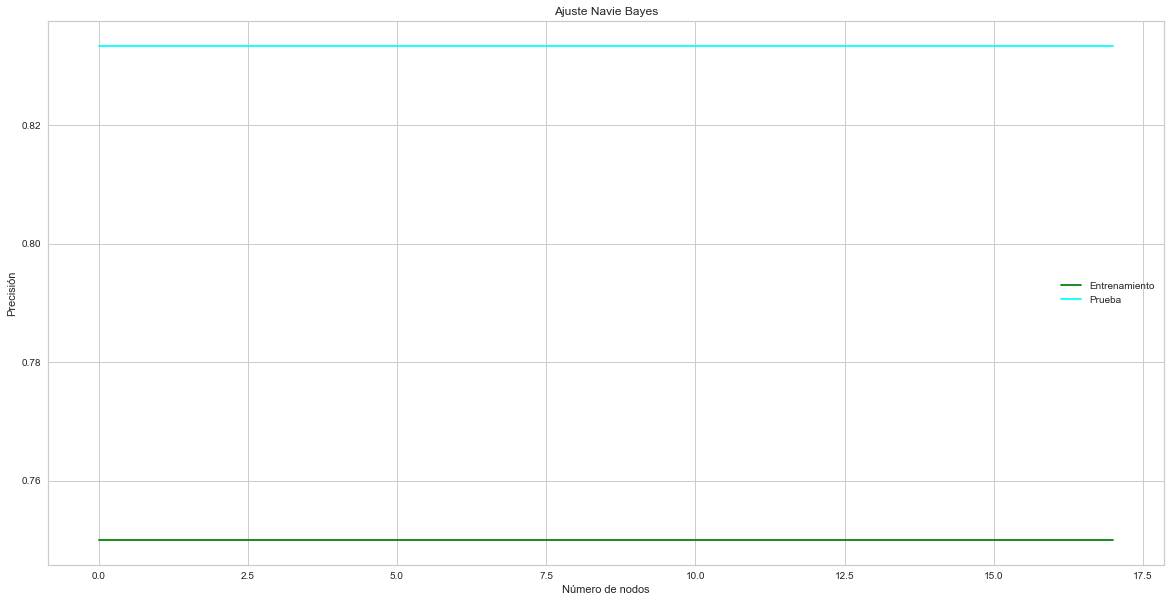

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [114]:
# Grafico de ajuste de Navie Bayes
#k_range = range(1, int(numAttri2))
k_range = range(1, numAttri1)

eval_prec = []
train_prec = []
for k in k_range:
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(train_prec, color = "green", label = "Entrenamiento")
plt.plot(eval_prec, color = "cyan", label = "Prueba")
plt.title("Ajuste Navie Bayes")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

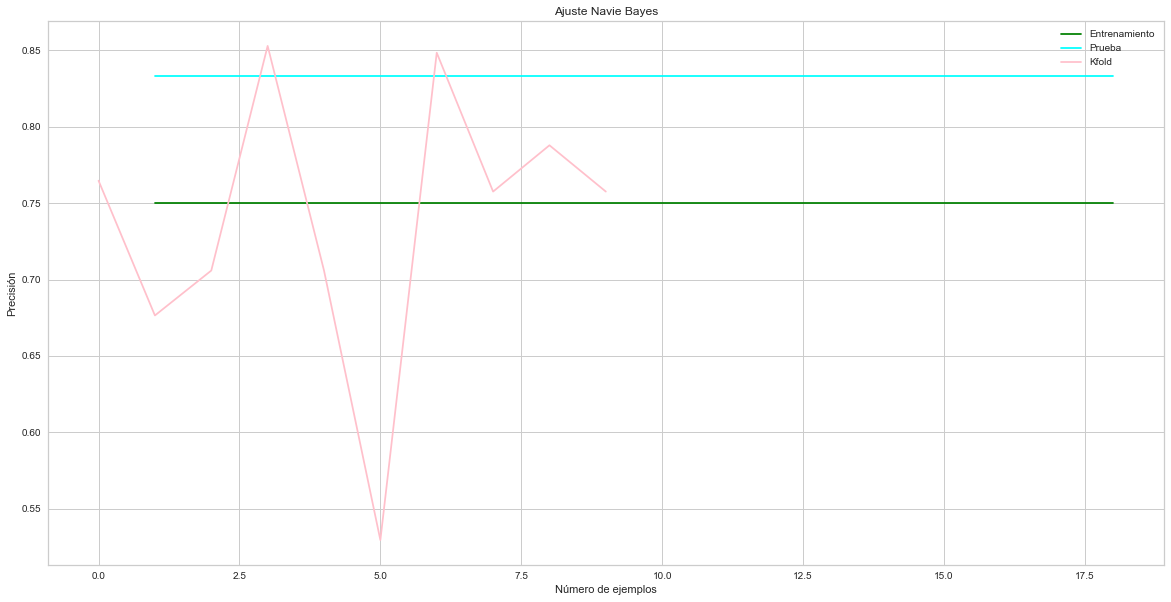

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [115]:
#Validación Cruzada Navie Bayes
precisionGNBE = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)                                                        

# Grafico de ajuste de Navie Bayes
#k_range = range(1, int(numAttri2))
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
    #precision((X_test, y_test))
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(k_range, train_prec, color = "green", label = "Entrenamiento")
plt.plot(k_range, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionGNBE, color = "pink", label = "Kfold")

plt.title("Ajuste Navie Bayes")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [116]:
#Precisión del modelo - Prueba
print("Precisión Navie Bayes - Prueba")
print(classification_report(y_test, y_pred2))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes - Prueba
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      0.20      0.33         5
           2       0.33      0.17      0.22         6
           3       0.83      0.88      0.86        17
           4       0.92      1.00      0.96        23
           5       1.00      1.00      1.00         6
           6       0.76      0.96      0.85        23

    accuracy                           0.83        84
   macro avg       0.84      0.67      0.70        84
weighted avg       0.83      0.83      0.81        84

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [117]:
#Precisión del modelo - Entrenamiento
print("Precisión Navie Bayes - Entrenamiento")
print(classification_report(y_train, y_pred22))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes - Entrenamiento
              precision    recall  f1-score   support

           0       0.71      0.19      0.30        26
           1       0.31      0.16      0.21        25
           2       0.42      0.21      0.28        24
           3       0.76      0.89      0.82        61
           4       0.84      0.94      0.89        96
           5       1.00      1.00      1.00        24
           6       0.69      0.88      0.77        80

    accuracy                           0.75       336
   macro avg       0.68      0.61      0.61       336
weighted avg       0.72      0.75      0.72       336

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [118]:
# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = gnb,
                        X = X, y = y, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

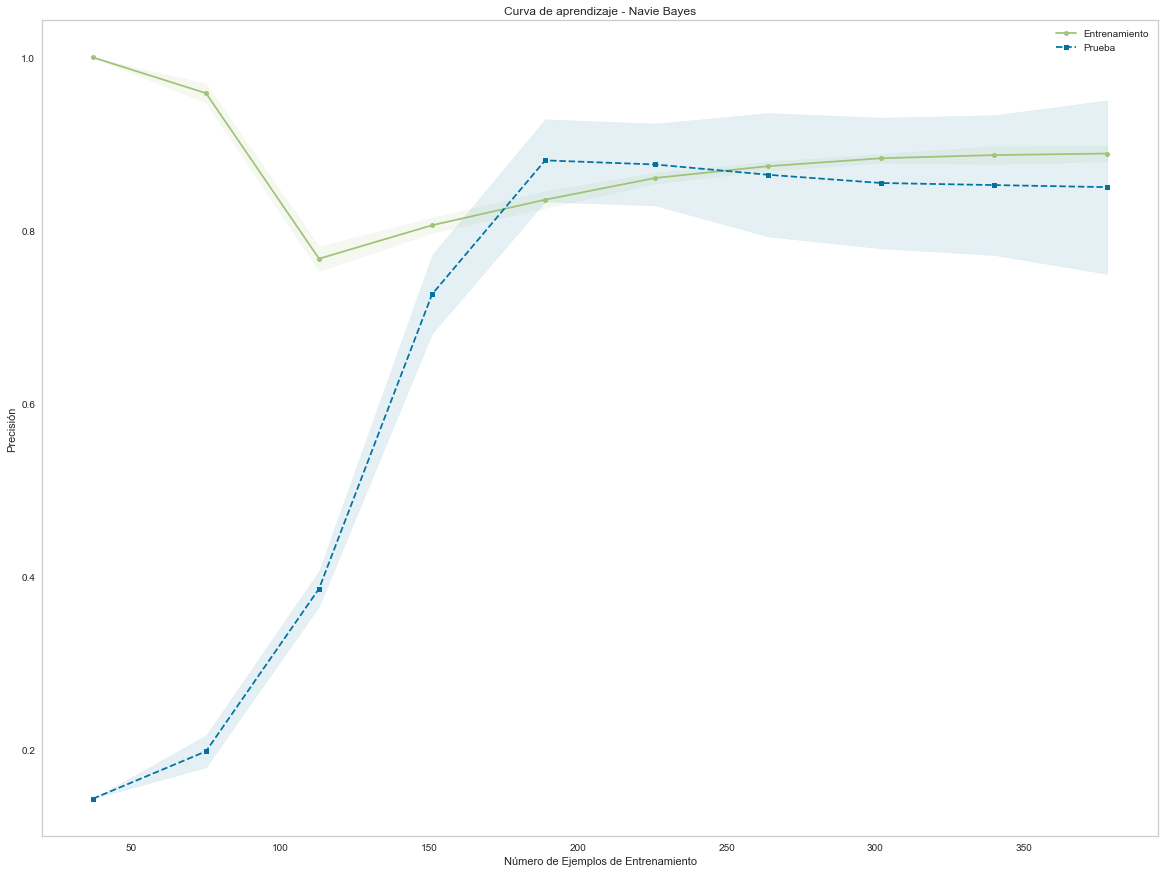

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [119]:
# Graficando las curvas
plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")

plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")

plt.grid()

plt.title("Curva de aprendizaje - Navie Bayes")
plt.legend(loc = "best")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [122]:
print("Promedio Total de Precisión:")
prom2 = float(np.mean(puntuación)*100)
print("{0:.2f}".format(prom2) + "%")
error2 = 100 - prom2
print("Protenjate de Error:")
print("{0:.2f}".format(error2) + "%")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Promedio Total de Precisión:
85.00%
Protenjate de Error:
15.00%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [123]:
print("Número de Aciertos")
asi2 = (int(Elem)/100)*prom2
print("{0:.0f}".format(asi2))
fallos2 = (int(Elem)/100)*error2
print("Número de Fallos")
print("{0:.0f}".format(fallos2))

Número de Aciertos
357
Número de Fallos
63


# Árboles de Decisión Clasificación

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import tree

print("\033[;31m"+"\n\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Árbol de Decisión Clasificación")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")



--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Árbol de Decisión Clasificación
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [125]:
print("Ingresa la profundidad máxima del árbol: ")
prof = input()
prof = int(prof)
#5

Ingresa la profundidad máxima del árbol: 


 6


In [126]:
print("Ingresa la función para medir la calidad de una división. Los criterios admitidos son 'gini' y 'entropy'.")
criterio = input()
#entropy
#gini

Ingresa la función para medir la calidad de una división. Los criterios admitidos son 'gini' y 'entropy'.


 entropy


In [127]:
#Algoritmo
ad = DecisionTreeClassifier(criterion = criterio, max_depth = prof)#Profundidad

In [128]:
#Rendimiento
puntaje3 = cross_val_score(ad, X, y, cv = pliegues, scoring = "accuracy")

In [129]:
#Lo Entreno
ad.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
#Predicción
y_pred3 = ad.predict(X_test)
y_pred33 = ad.predict(X_train)

In [131]:
predecir = cross_val_predict(ad, X, y, cv = pliegues)
matriz = confusion_matrix(y, predecir)
print("Matriz de Confusión")
print(matriz)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión
[[ 29   0   0   0   0   0   1]
 [  0  26   1   0   1   0   2]
 [  1   3  22   0   0   0   4]
 [  0   0   0  77   0   0   1]
 [  0   0   0   1 118   0   0]
 [  0   0   0   0   0  30   0]
 [  0   3   3   0   0   0  97]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [132]:
predicciones = []
for f in  predecir:
    r= random.triangular(-.1, .1)
    r = round(r, 3)
    predicciones.append(f + r)

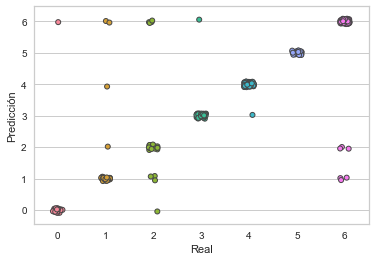

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [133]:
real = pd.DataFrame(data = y, columns = ["Real"])
clases = pd.DataFrame(data = y, columns = ["Clases"])
predecidas = pd.DataFrame(data = predicciones, columns = ["Predicción"])
matrix = pd.concat([real, predecidas, clases], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = matrix, jitter = .1, linewidth = 1)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [134]:
df_confusion3 = pd.crosstab(y_test, y_pred3)
df_confusion33 = pd.crosstab(y_train, y_pred33)

In [135]:
df_confusion3 = pd.crosstab(y_test, y_pred3, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion33 = pd.crosstab(y_train, y_pred33, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)

In [136]:
df_conf_norm3 = df_confusion3 / df_confusion3.sum(axis = 1)
df_conf_norm33 = df_confusion33 / df_confusion33.sum(axis = 1)

In [137]:
def plot_confusion_matrix(df_confusion3, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion3, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion3.columns))
    plt.xticks(tick_marks, df_confusion3.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion3.index)
    plt.ylabel(df_confusion3.index.name)
    plt.xlabel(df_confusion3.columns.name)
    
def plot_confusion_matrix3(df_confusion33, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion33, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion33.columns))
    plt.xticks(tick_marks, df_confusion33.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion33.index)
    plt.ylabel(df_confusion33.index.name)
    plt.xlabel(df_confusion33.columns.name)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




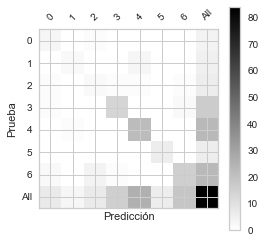

In [138]:
plot_confusion_matrix(df_confusion3)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [139]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizAD = confusion_matrix(y_test, y_pred3)
print("Matriz de Confusión - Prueba:")
print(matrizAD)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Prueba:
[[ 3  0  1  0  0  0  0]
 [ 0  2  0  0  3  0  0]
 [ 1  0  2  1  1  0  1]
 [ 1  0  0 14  0  0  2]
 [ 0  1  0  0 22  0  0]
 [ 0  0  0  0  0  6  0]
 [ 2  0  4  1  0  0 16]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [140]:
#Precisión Prueba
preADP = precision_score(y_test, y_pred, average = "weighted")#Ponderado
preADP = float(preADP)*100
print("Precisión Árbol de Decisión:")
print("{0:.2f}".format(preADP) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Árbol de Decisión:
82.29%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




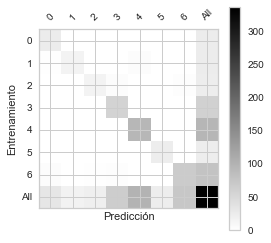

In [141]:
plot_confusion_matrix3(df_confusion33)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [142]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó 
matrizAD = confusion_matrix(y_train, y_pred33)
print("Matriz de Confusión - Entrenamiento:")
print(matrizAD)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Entrenamiento:
[[25  0  0  0  0  0  1]
 [ 2 17  1  0  5  0  0]
 [ 1  0 16  4  0  0  3]
 [ 0  0  1 59  0  0  1]
 [ 0  0  1  0 95  0  0]
 [ 0  0  0  0  0 24  0]
 [ 5  1  2  3  0  0 69]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




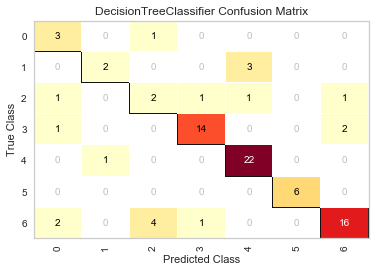

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [143]:
cm = ConfusionMatrix(ad, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

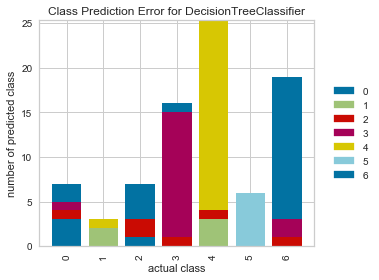

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [144]:
# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    ad, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [146]:
#Validación Cruzada Prueba
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Prueba: ")
print("Precisiones: {}\n".format(precisionADP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADP),
                                          np.std(precisionADP)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Prueba: 
Precisiones: [0.76190476 0.71428571]

Precisión promedio:  0.738 +/-  0.024
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [147]:
#Validación Cruzada Entrenamiento
precisionADE = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Entrenamiento")
print("Precisiones: {}\n".format(precisionADE))
print("Precision promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADE),
                                          np.std(precisionADE)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Entrenamiento
Precisiones: [0.73529412 0.61764706 0.73529412 0.82352941 0.76470588 0.58823529
 0.81818182 0.75757576 0.72727273 0.84848485]

Precision promedio:  0.742 +/-  0.080
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




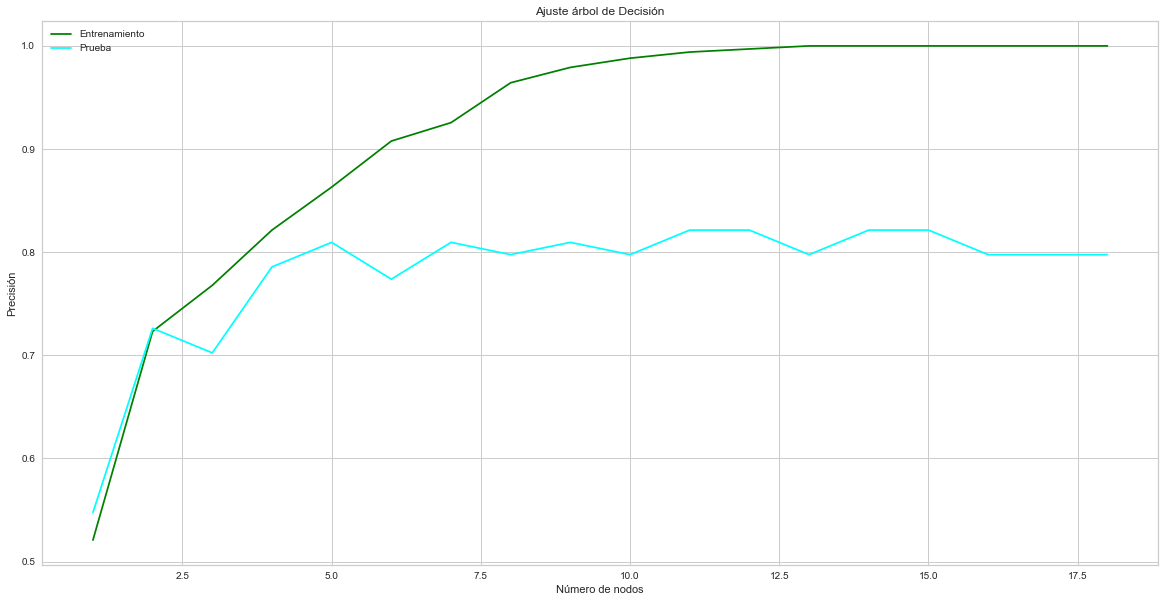

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [148]:
# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion = criterio, max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de nodos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

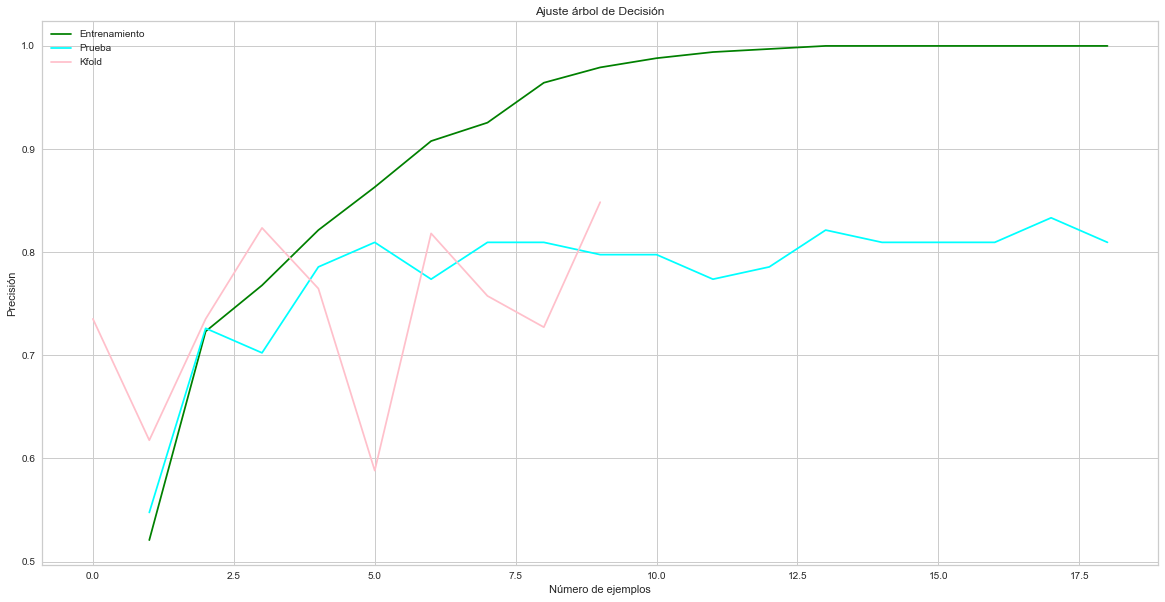

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [149]:
#Validación Cruzada 
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion  = criterio, max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionADP, color = "pink", label = "Kfold")

plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [150]:
print("Precisión Árbol de Decisión - Prueba")
print(classification_report(y_test, y_pred3))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Árbol de Decisión - Prueba
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.67      0.40      0.50         5
           2       0.29      0.33      0.31         6
           3       0.88      0.82      0.85        17
           4       0.85      0.96      0.90        23
           5       1.00      1.00      1.00         6
           6       0.84      0.70      0.76        23

    accuracy                           0.77        84
   macro avg       0.71      0.71      0.69        84
weighted avg       0.79      0.77      0.78        84

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [151]:
print("Precisión Árbol de Decisión - Entrenamiento")
print(classification_report(y_train, y_pred33))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Árbol de Decisión - Entrenamiento
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.94      0.68      0.79        25
           2       0.76      0.67      0.71        24
           3       0.89      0.97      0.93        61
           4       0.95      0.99      0.97        96
           5       1.00      1.00      1.00        24
           6       0.93      0.86      0.90        80

    accuracy                           0.91       336
   macro avg       0.89      0.88      0.88       336
weighted avg       0.91      0.91      0.91       336

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [152]:
# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = ad,
                        X = X, y = y, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

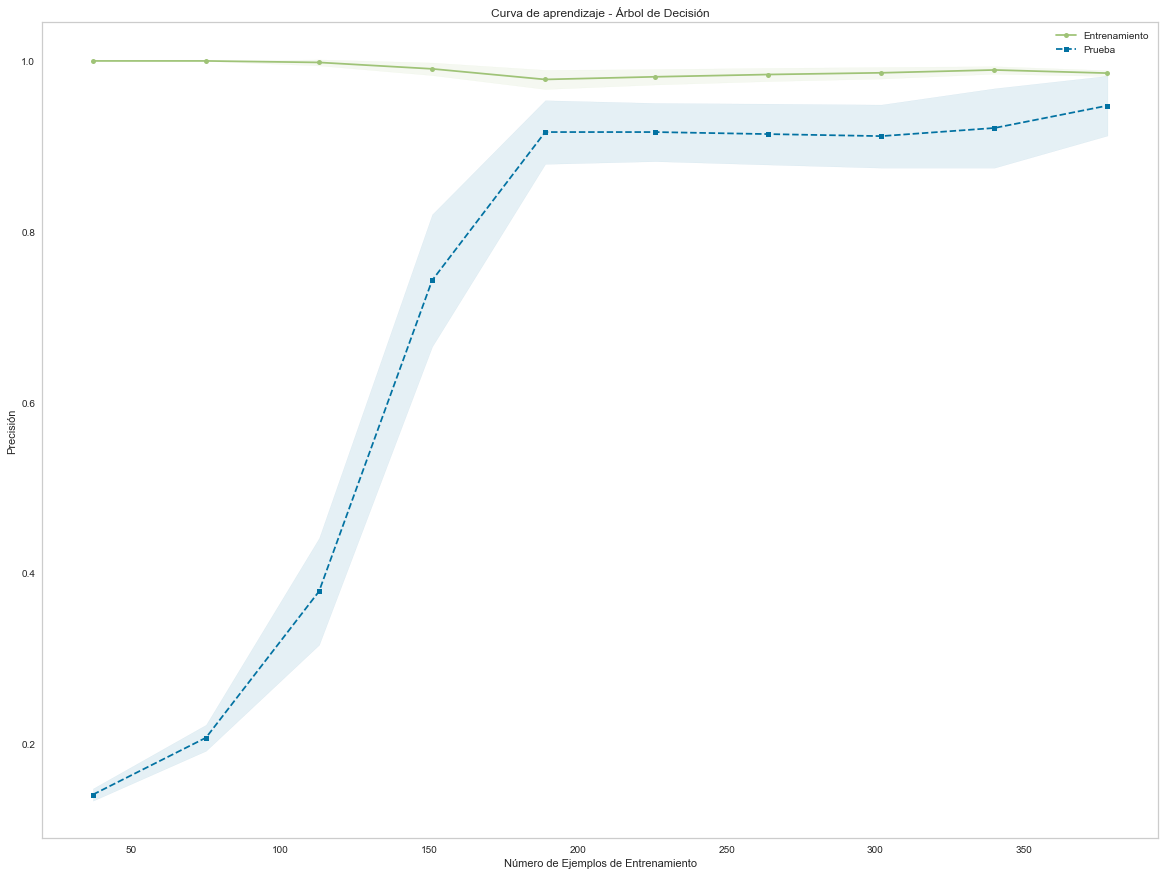

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [153]:
# Graficando las curvas
plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color='g')

plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")

plt.grid()

plt.title("Curva de aprendizaje - Árbol de Decisión")
plt.legend(loc = "best")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [154]:
print("Profundidad del Árbol")
ad.tree_.max_depth


Profundidad del Árbol


6

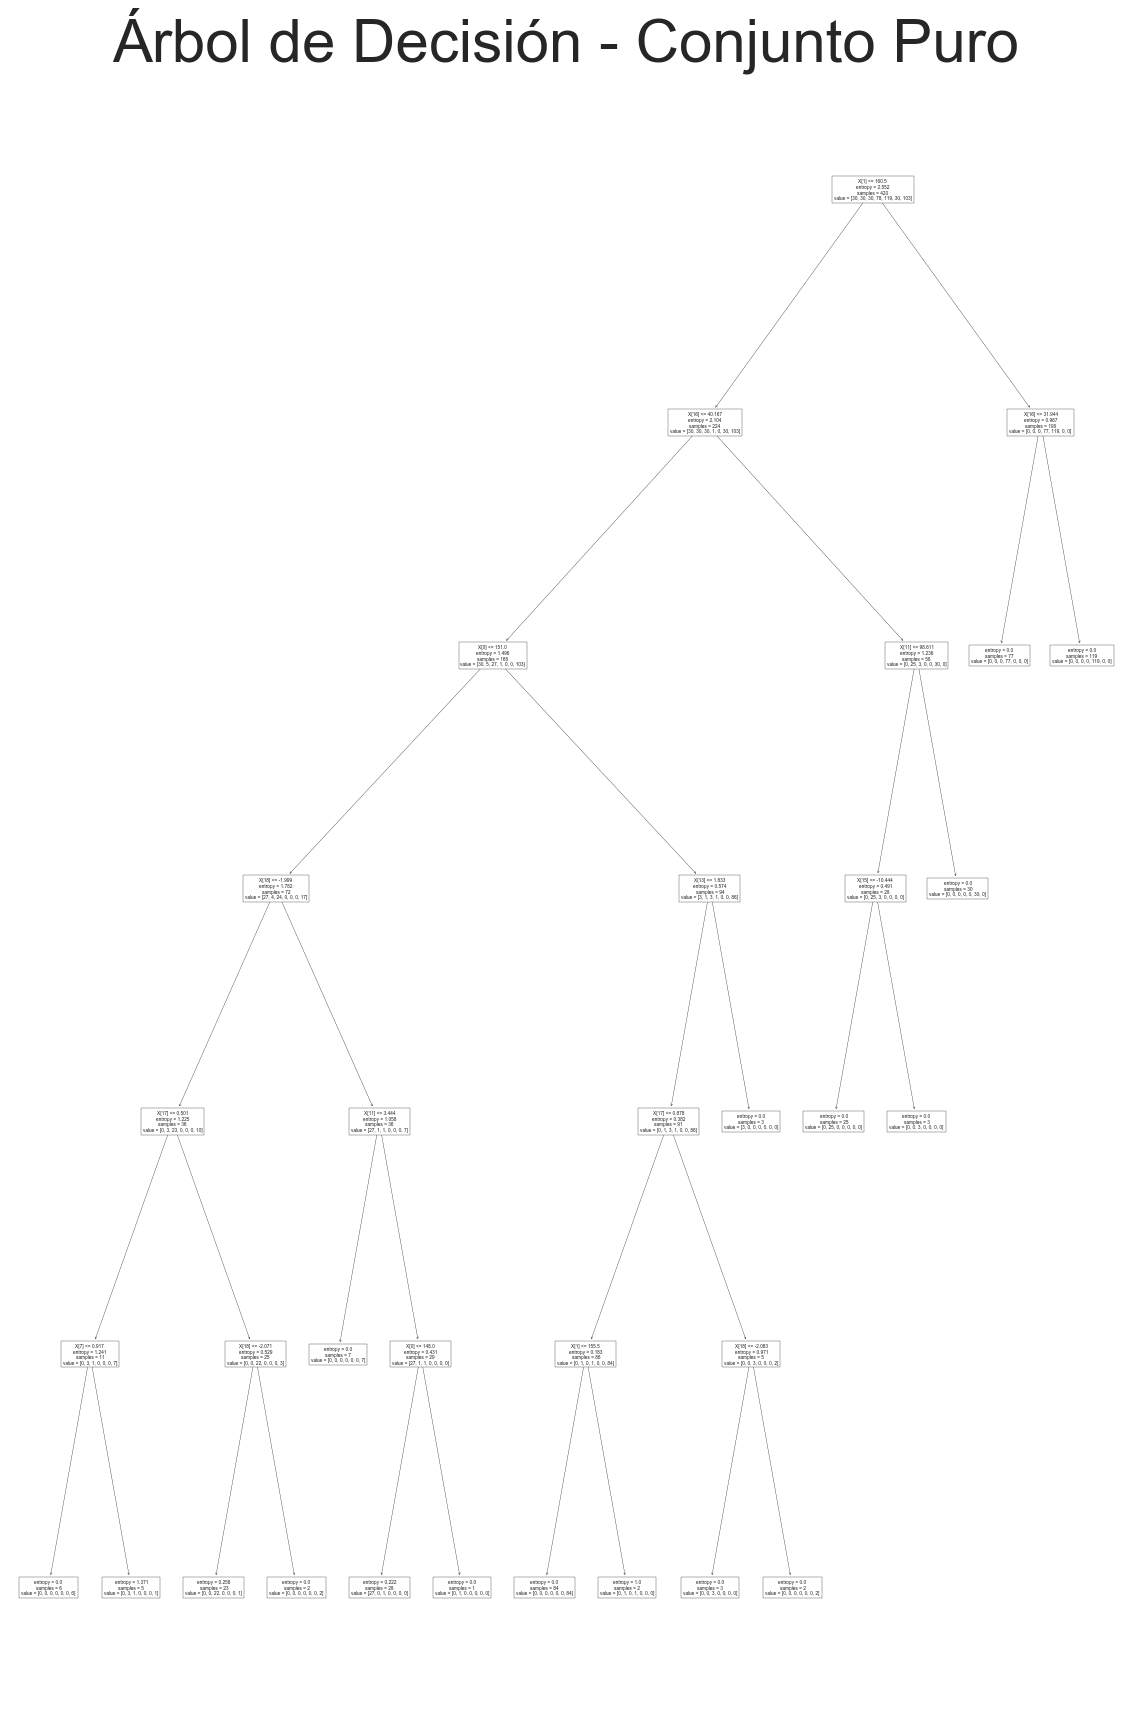

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [155]:
fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X, y)) 
plt.title("Árbol de Decisión - Conjunto Puro", fontsize = 60)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

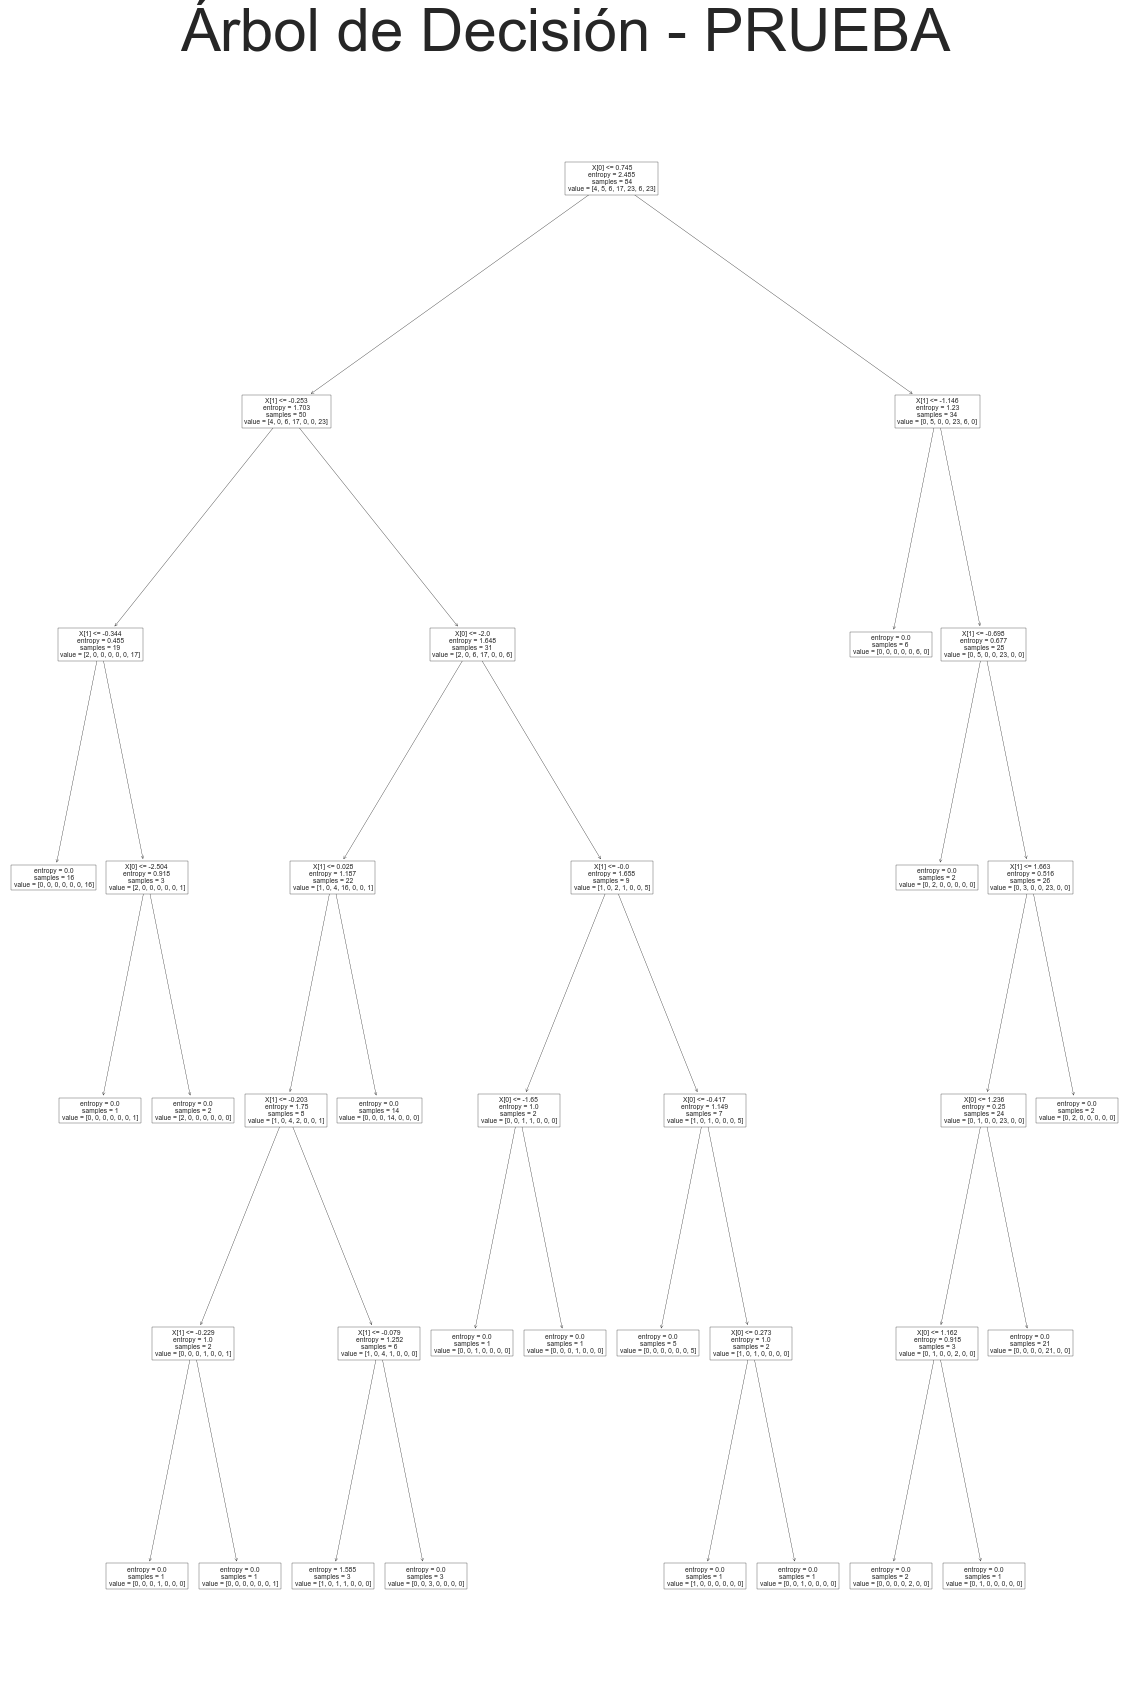

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [157]:
fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X_test, y_test)) 
plt.title("Árbol de Decisión - PRUEBA", fontsize =60)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

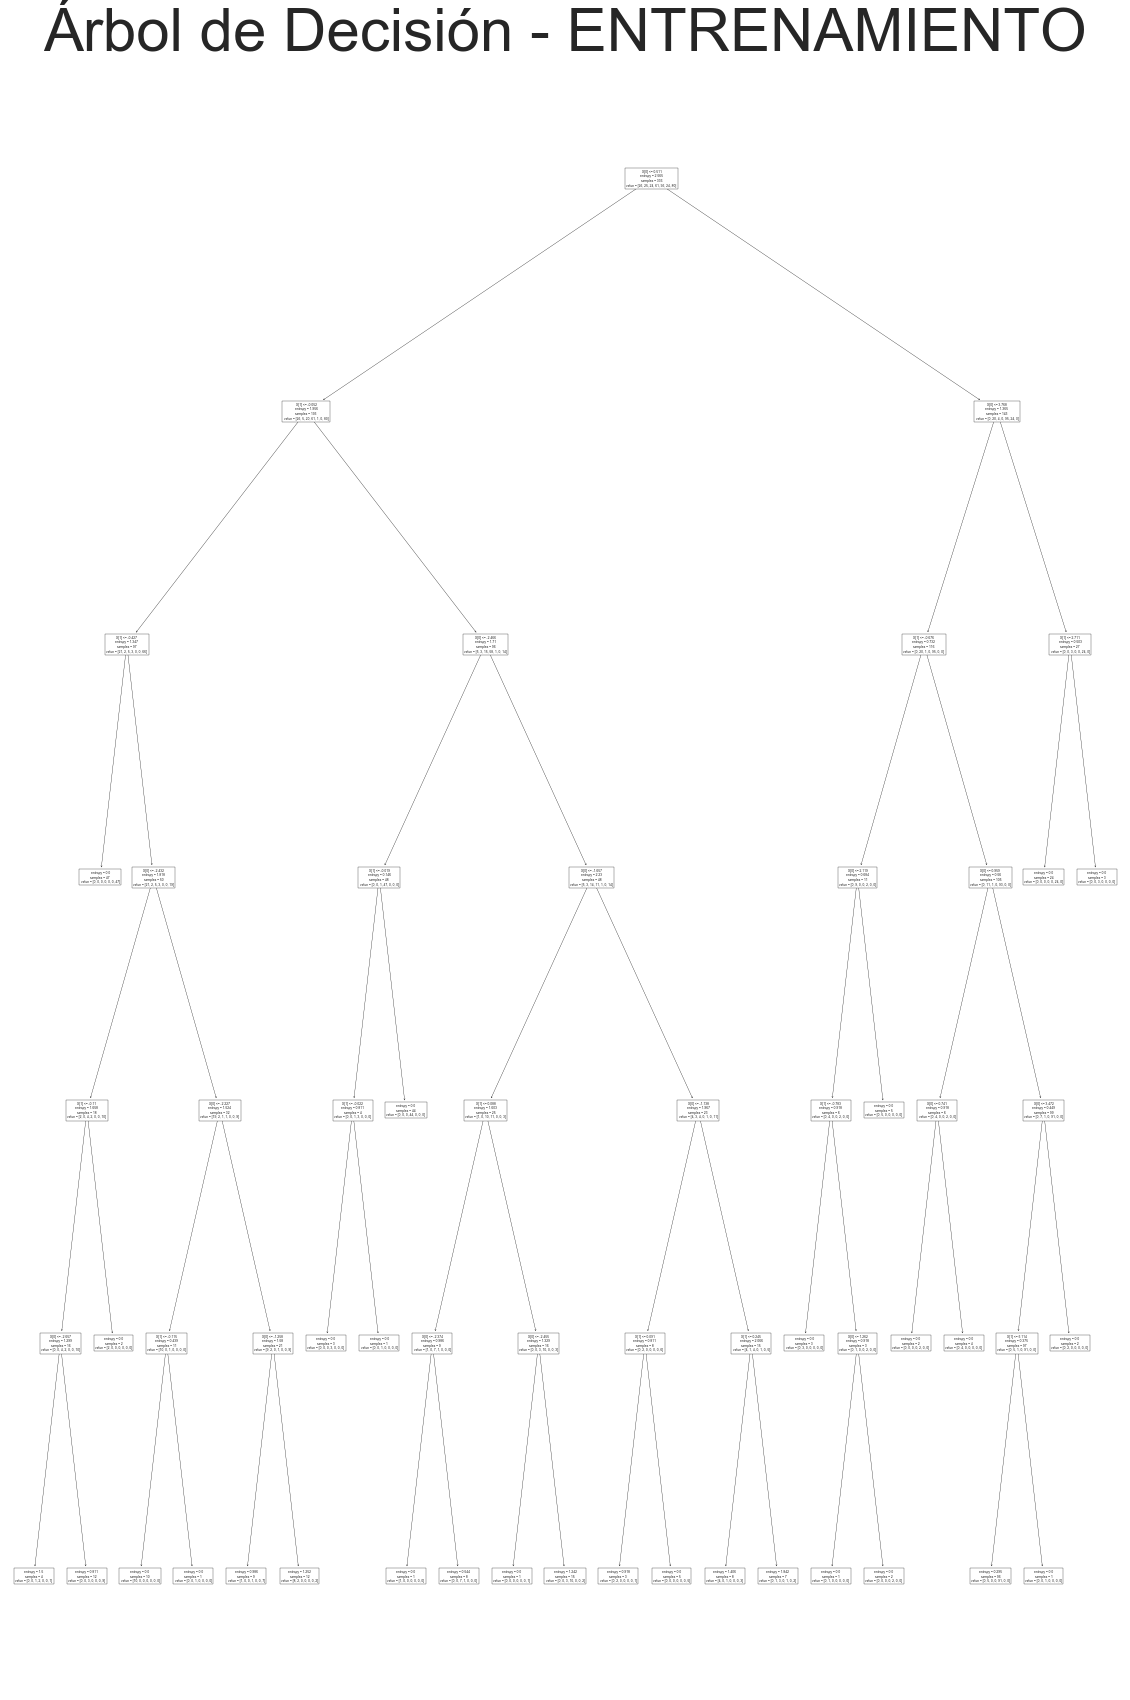

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [158]:
fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X_train, y_train)) 
plt.title("Árbol de Decisión - ENTRENAMIENTO", fontsize = 60)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [162]:
print("Promedio Total de Precisión:")
prom3 = float(np.mean(puntaje3)*100)
print("{0:.2f}".format(prom3) + "%")
error3 = 100 - prom3
print("Protenjate de Error:")
print("{0:.2f}".format(error3) + "%")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Promedio Total de Precisión:
95.24%
Protenjate de Error:
4.76%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [164]:
print("Número de Aciertos")
asi3 = (int(Elem)/100)*prom3
print("{0:.0f}".format(asi2))
fallos3 = (int(Elem)/100)*error3
print("Número de Fallos")
print("{0:.0f}".format(fallos3))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Número de Aciertos
357
Número de Fallos
20
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [165]:
print("Promedio Total de Precisión de los 3 Clasificadores")
prom = (float(np.mean(puntaje)*100)) + float(np.mean(puntuación)*100) + (float(np.mean(puntaje3)*100))
prom = prom/3
print("{0:.2f}".format(prom) + "%")
error = 100 - prom
print("Protenjate de Error de los 3 Clasificadores")
print("{0:.2f}".format(error) + "%")

Promedio Total de Precisión de los 3 Clasificadores
90.32%
Protenjate de Error de los 3 Clasificadores
9.68%


In [166]:
print("Número de Aciertos")
asi = (int(Elem)/100)*prom
print("{0:.0f}".format(asi))
fallos = (int(Elem)/100)*error
print("Número de Fallos")
print("{0:.0f}".format(fallos))

Número de Aciertos
379
Número de Fallos
41


In [167]:
evc = VotingClassifier(estimators=[('kvc',kvc), ('gnb', gnb), ('ad', ad)], voting='hard')

In [168]:
evc.fit(X, y)

VotingClassifier(estimators=[('kvc',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=7,
                                                   p=2, weights='uniform')),
                             ('gnb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('ad',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=6,
                                                     max_features=None,
                             

In [169]:
evc.score(X, y)

0.9642857142857143

In [199]:
print("Proyecto Elaborado por:\nAbraham Flores Basilio")
print("Repositorio: https://github.com/AbrahamFB/Miner-a-de-Datos")

Proyecto Elaborado por:
Abraham Flores Basilio
Repositorio: https://github.com/AbrahamFB/Miner-a-de-Datos


In [146]:
X = np.array(df2.drop([numAttri1], 1))
y = np.array(df2[numAttri1])

In [166]:
# importing libraries 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# group / ensemble of models 
estimator = [] 
estimator.append(('LR',  
                  LogisticRegression(solver ='lbfgs',  
                                     multi_class ='multinomial',  
                                     max_iter = 200))) 
estimator.append(('KVC', kvc)) 
estimator.append(('GNB', gnb)) 
estimator.append(('AD', ad)) 
  
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 
  
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train, y_train) 
y_pred = vot_soft.predict(X_test) 
  
# using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 
##https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/

Hard Voting Score  0
Soft Voting Score  0


In [169]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([kvc, gnb, ad], labels):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    

5-fold cross validation:

Accuracy: 0.79 (+/- 0.02) [Logistic Regression]
Accuracy: 0.76 (+/- 0.02) [Random Forest]
Accuracy: 0.74 (+/- 0.02) [Naive Bayes]


In [181]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[kvc, gnb, ad], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([kvc, gnb, ad, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=pliegues, 
                                              scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    ##http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/

Accuracy: 0.9071 (+/- 0.04) [Logistic Regression]
Accuracy: 0.8500 (+/- 0.10) [Random Forest]
Accuracy: 0.9500 (+/- 0.02) [Naive Bayes]
Accuracy: 0.9333 (+/- 0.03) [Ensemble]


In [171]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = kvc
clf2 = gnb
clf3 = ad

eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))

np.array_equal(eclf1.named_estimators_.lr.predict(X),
               eclf1.named_estimators_['lr'].predict(X))

eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))

eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft',
       flatten_transform=True)
eclf3 = eclf3.fit(X, y)
print(eclf3.predict(X))

print(eclf3.transform(X).shape)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 0 2 2 2 2 2 0 0 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 6 1
 1 1 1 1 1 1 1 1 1 6 6 6 1 6 6 6 6 6 6 6 0 6 6 6 6 0 6 6 6 0 6 1 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 0 2 2 2 2

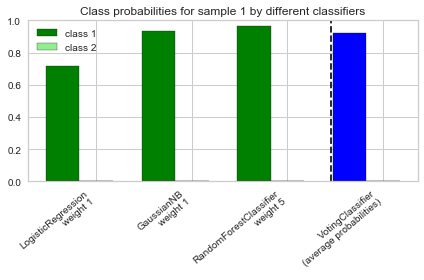

In [156]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = kvc
clf2 = gnb
clf3 = ad

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        voting='soft',
                        weights=[1, 1, 5])

# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()

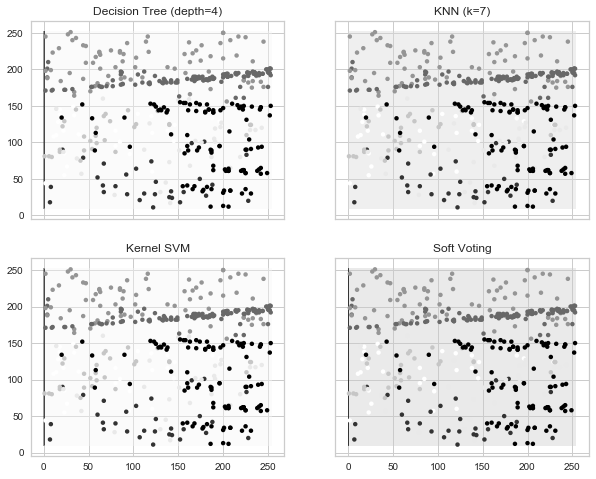

In [170]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data


# Training classifiers
clf1 = ad
clf2 = gnb
clf3 = ad
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='hard', weights=[2, 1, 2])

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
eclf.fit(X_train, y_train)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [144]:
clf_list = [('decision tree', DecisionTreeClassifier()),
            ('logistic regression', LogisticRegression()),
            ('knn', KNeighborsClassifier()),
            ('naive bayes classifier', GaussianNB())]
##https://levelup.gitconnected.com/ensemble-learning-using-the-voting-classifier-a28d450be64d

In [145]:
for model_tuple in clf_list:
    model = model_tuple[1]
    if 'random_state' in model.get_params().keys():
        model.set_params(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print(f"{model_tuple[0]}'s accuracy: {acc:.2f}")
##https://levelup.gitconnected.com/ensemble-learning-using-the-voting-classifier-a28d450be64d

decision tree's accuracy: 0.76
logistic regression's accuracy: 0.79
knn's accuracy: 0.81
naive bayes classifier's accuracy: 0.77


In [146]:
voting_clf = VotingClassifier(clf_list, voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(f"Voting Classifier's accuracy: {accuracy_score(y_pred, y_test):.2f}")
##https://levelup.gitconnected.com/ensemble-learning-using-the-voting-classifier-a28d450be64d

Voting Classifier's accuracy: 0.80


In [ ]:
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
l_loss = log_loss(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

In [ ]:
from mlxtend.feature_selection import ColumnSelector


col_sel = ColumnSelector(cols=[0, 2])

clf1_pipe = Pipeline([('sel', col_sel),
                      ('logreg', clf1)])

eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3],
                              voting='soft')
eclf.fit(X, y).predict(X[[1, 51, 149]])

In [ ]:
sfs1 = SequentialFeatureSelector(clf1, 
                                 k_features=2,
                                 forward=True, 
                                 floating=False, 
                                 scoring='accuracy',
                                 verbose=1,
                                 cv=0)

sfs1.fit(X, y)

print('Best features', sfs1.k_feature_idx_)

col_sel = ColumnSelector(cols=sfs1.k_feature_idx_)

clf1_pipe = Pipeline([('sel', col_sel),
                      ('logreg', clf1)])

In [ ]:
eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3], 
                              voting='soft')
eclf.fit(X, y).predict(X[[1, 51, 149]])